In [1]:
import warnings
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from src.utils import central_tendances, calculate_quartiles, histogram_plot, bar_plot
import sys

# Specify the directory where your data is located
project_dir = "D:/2M/D.Mining/Data-Mining-Project/"

# Change the working directory
sys.path.append(project_dir)

warnings.filterwarnings("ignore")

# Specify the directory where your data is located
data_directory = 'D:/2M/D.Mining/Data-Mining-Project/'

# Change the working directory
os.chdir(data_directory)

sys.path.append('D:\\2M\D.Mining\Data-Mining-Project\\')

In [2]:
import warnings

warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100

## Load data


In [3]:
df = pd.read_csv(
    'data/interim/03_temp_dataset_processed_outliers_removed.csv', index_col=0)

## Data Exploration


### General Information


In [4]:
df.head(10)

,zcta,population,test count,positive tests,case count,test rate,case rate,positivity rate
Midpoint Date,,,,,,,,
2019-07-02,94086.0,50477.0,50.0,0.0,0.0,0.1,0.0,0.0
2020-01-01,95127.0,66256.0,66.0,0.0,0.0,0.1,0.0,0.0
2020-01-01,95128.0,36975.0,110.0,0.0,0.0,0.3,0.0,0.0
2020-01-22,94085.0,23223.0,46.0,0.0,0.0,0.2,0.0,0.0
2020-01-22,95129.0,39741.0,39.0,0.0,0.0,0.1,0.0,0.0
2020-03-04,94085.0,23223.0,487.0,146.0,139.0,2.1,0.6,30.0
2020-03-04,94087.0,56668.0,510.0,139.0,170.0,0.9,0.3,27.3
2020-03-04,95035.0,79655.0,876.0,230.0,238.0,1.1,0.3,26.3
2020-03-04,95128.0,36975.0,332.0,94.0,110.0,0.9,0.3,28.6


In [5]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 2019-07-02 to 2022-10-26
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zcta             305 non-null    float64
 1   population       305 non-null    float64
 2   test count       305 non-null    float64
 3   positive tests   305 non-null    float64
 4   case count       305 non-null    float64
 5   test rate        305 non-null    float64
 6   case rate        305 non-null    float64
 7   positivity rate  305 non-null    float64
dtypes: float64(8)
memory usage: 21.4+ KB


""


In [6]:
df.describe()

,zcta,population,test count,positive tests,case count,test rate,case rate,positivity rate
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,94657.409836,49602.885246,4388.855738,172.095082,205.672131,426.043607,13.768852,4.359016
std,507.568545,17619.311722,2846.179436,205.987450,229.664567,246.947992,15.324513,4.735288
min,94085.000000,23223.000000,39.000000,0.000000,0.000000,0.100000,0.000000,0.000000
25%,94086.000000,36975.000000,2269.000000,40.000000,52.000000,254.000000,3.500000,1.200000
50%,95035.000000,50477.000000,3961.000000,92.000000,115.000000,413.700000,7.800000,2.700000
75%,95128.000000,66256.000000,6305.000000,208.000000,278.000000,586.200000,17.400000,5.800000
max,95129.000000,79655.000000,15599.000000,1149.000000,1523.000000,1280.300000,81.700000,30.000000


## Visualization


In [60]:
# change the type of zcta to object
df["zcta"] = df["zcta"].astype("str")

### 1. Distribution of the total number of confirmed cases and positive tests by zones

(Indication :Tree Map/Bar chart)


<Axes: xlabel='zcta'>

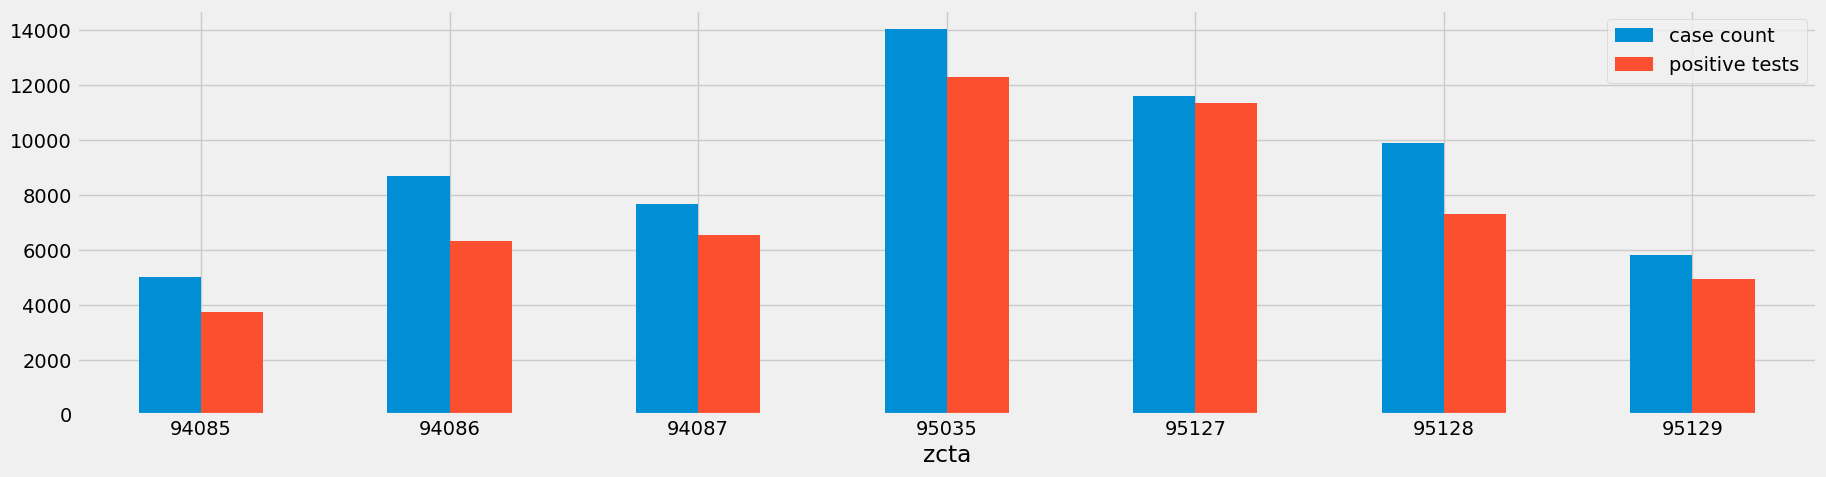

In [61]:
# 1. Distribution of the total number of confirmed cases and positive tests by zones bar plot
df.groupby('zcta')[['case count', 'positive tests']].sum().plot(
    kind='bar', figsize=(20, 5), rot=0)

### 2. How do COVID-19 tests, positive tests, and the number of cases evolve over time (weekly, monthly, and annually) for a chosen area?

(Indication: Line chart)


In [62]:
df['zcta'].unique()

array(['94086', '95127', '95128', '94085', '95129', '94087', '95035'],
      dtype=object)

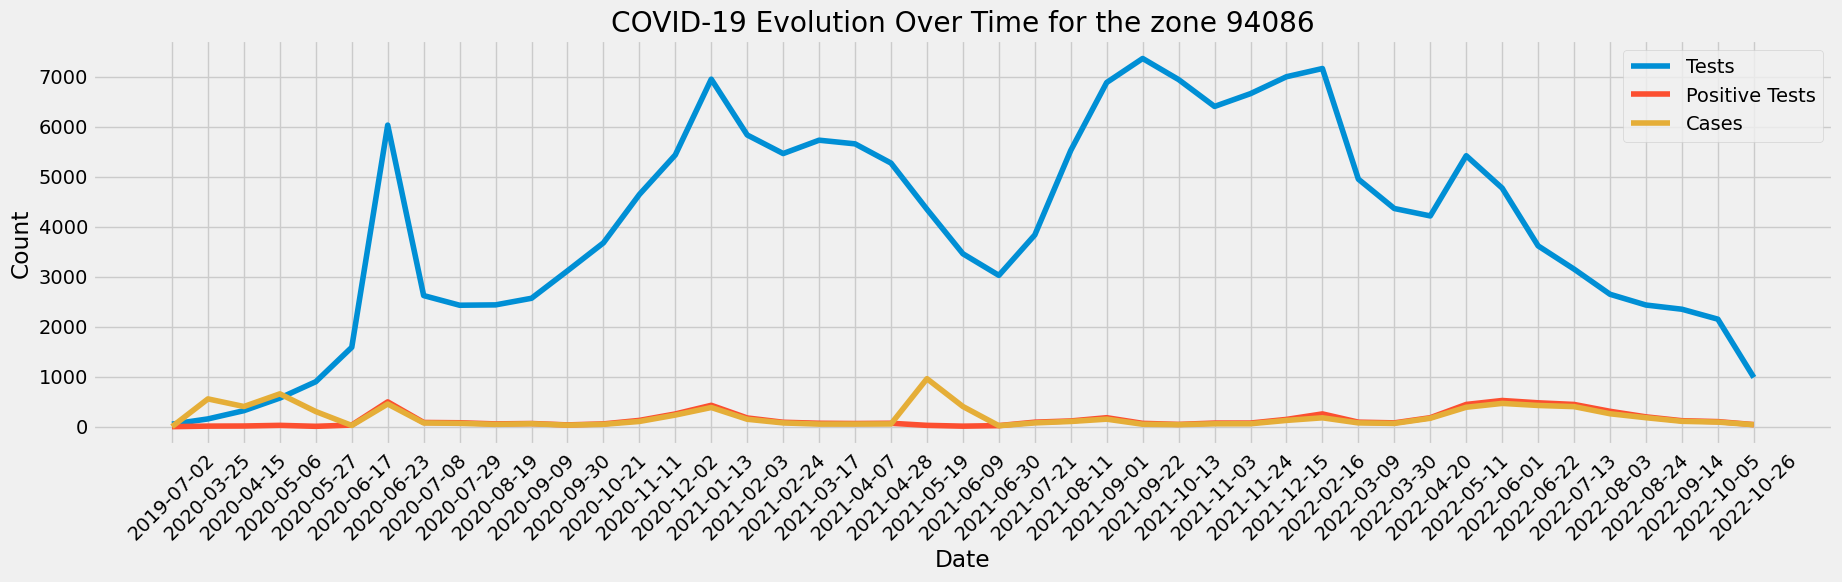

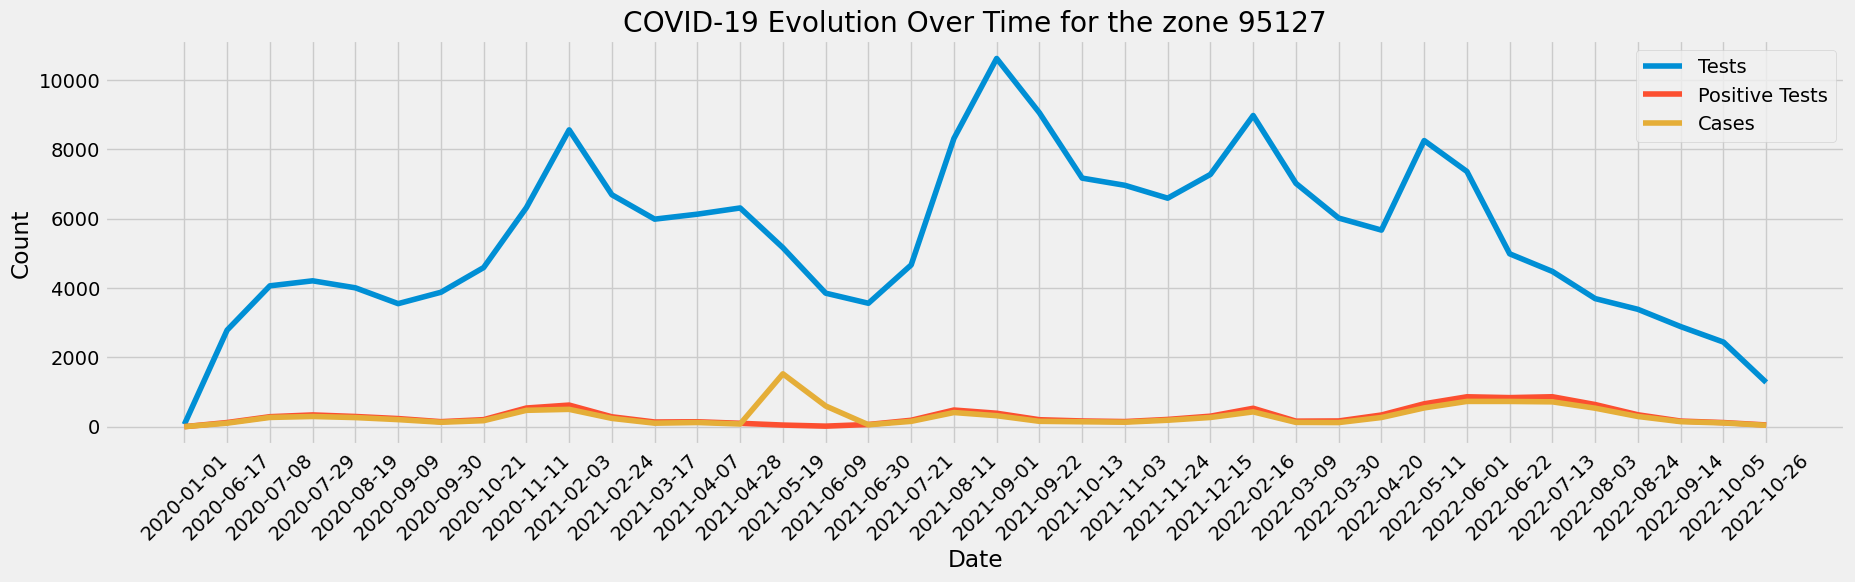

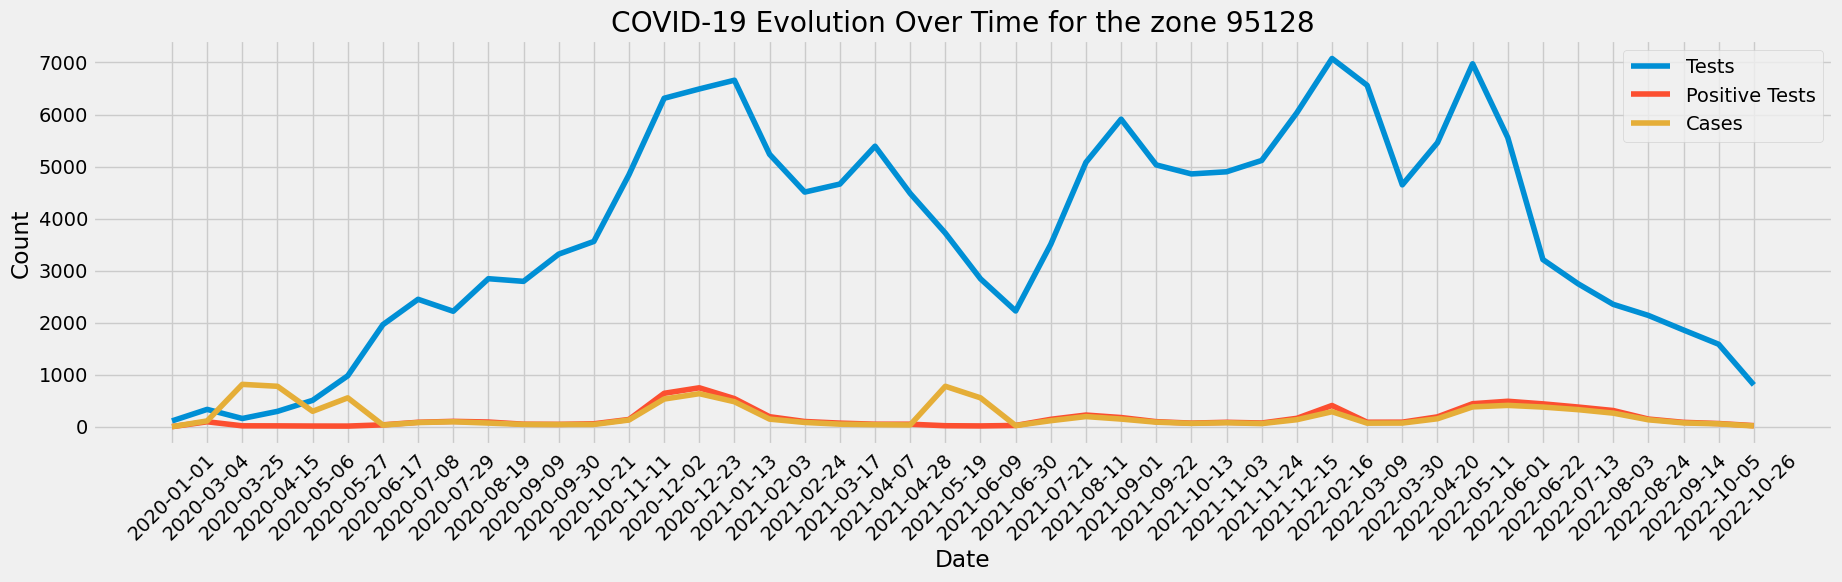

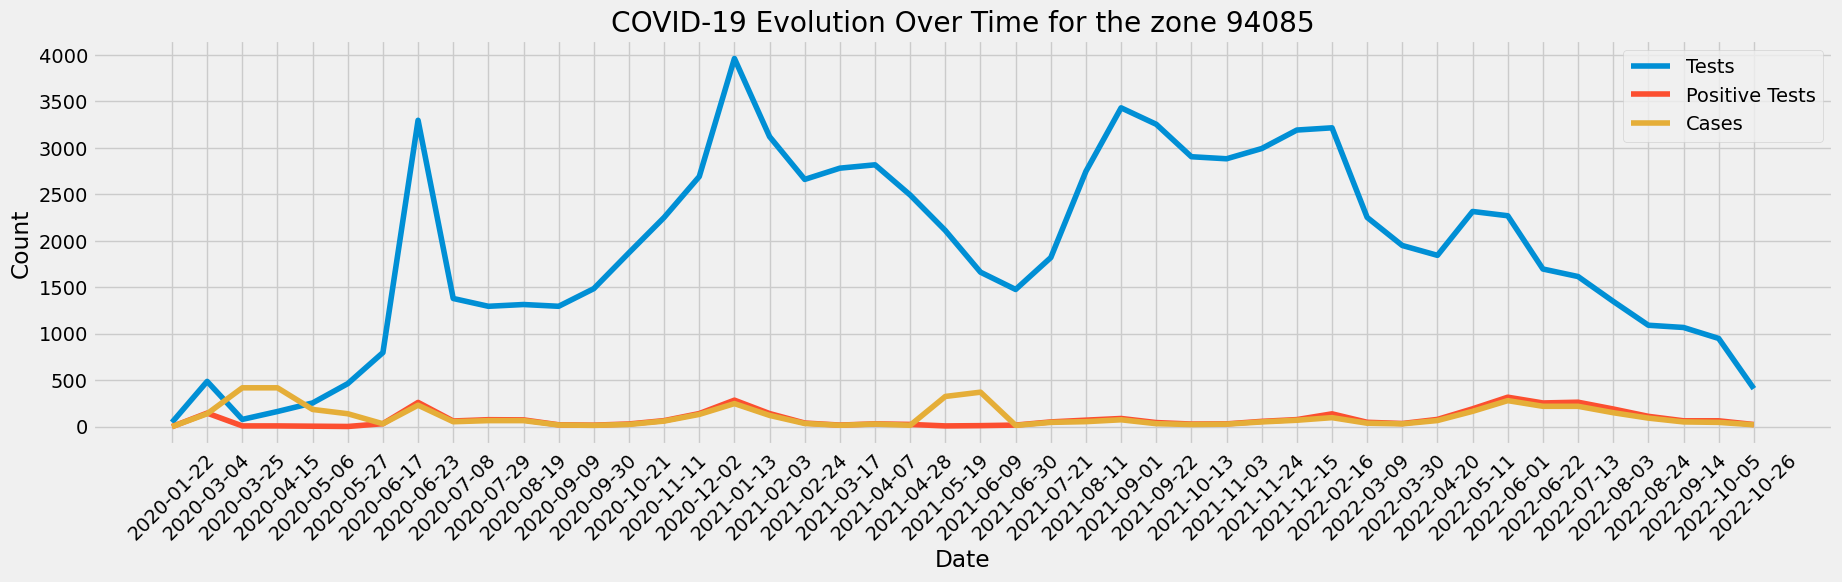

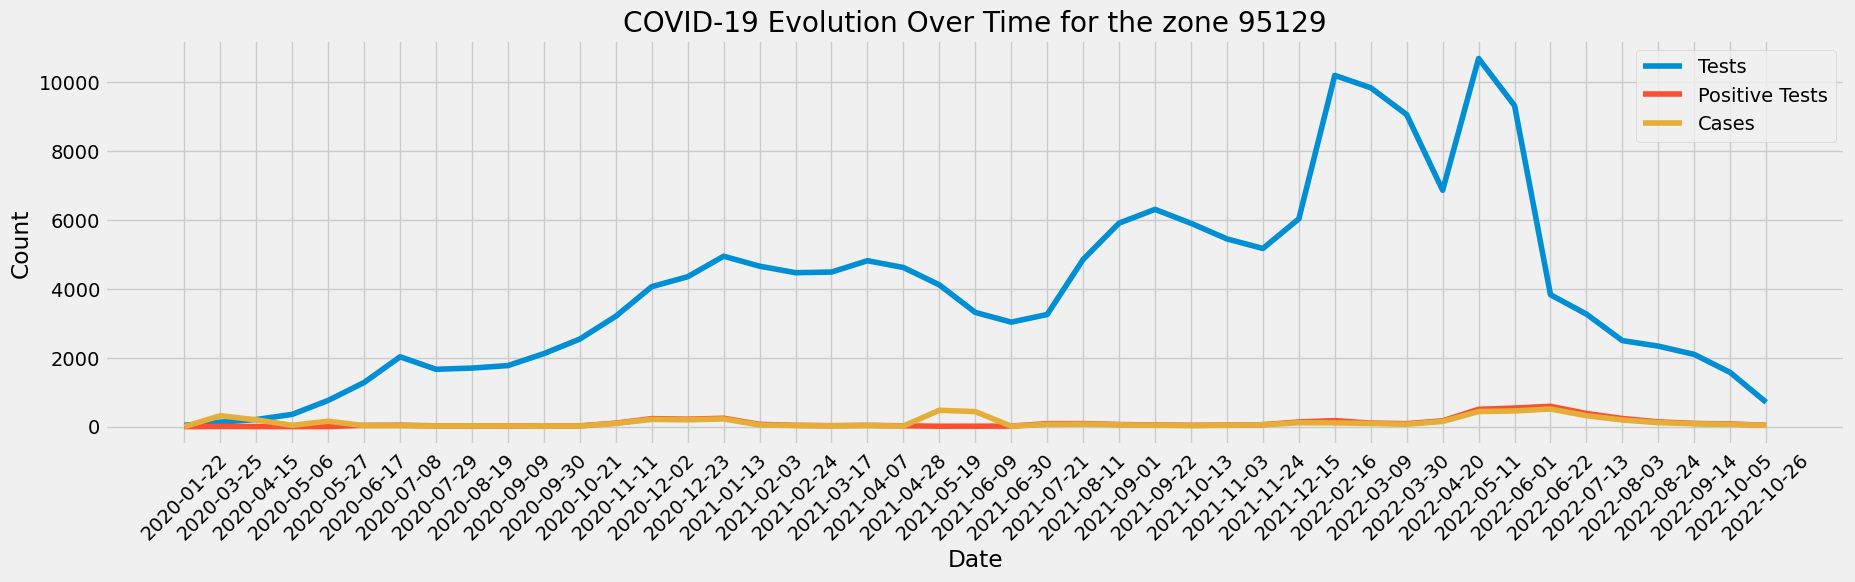

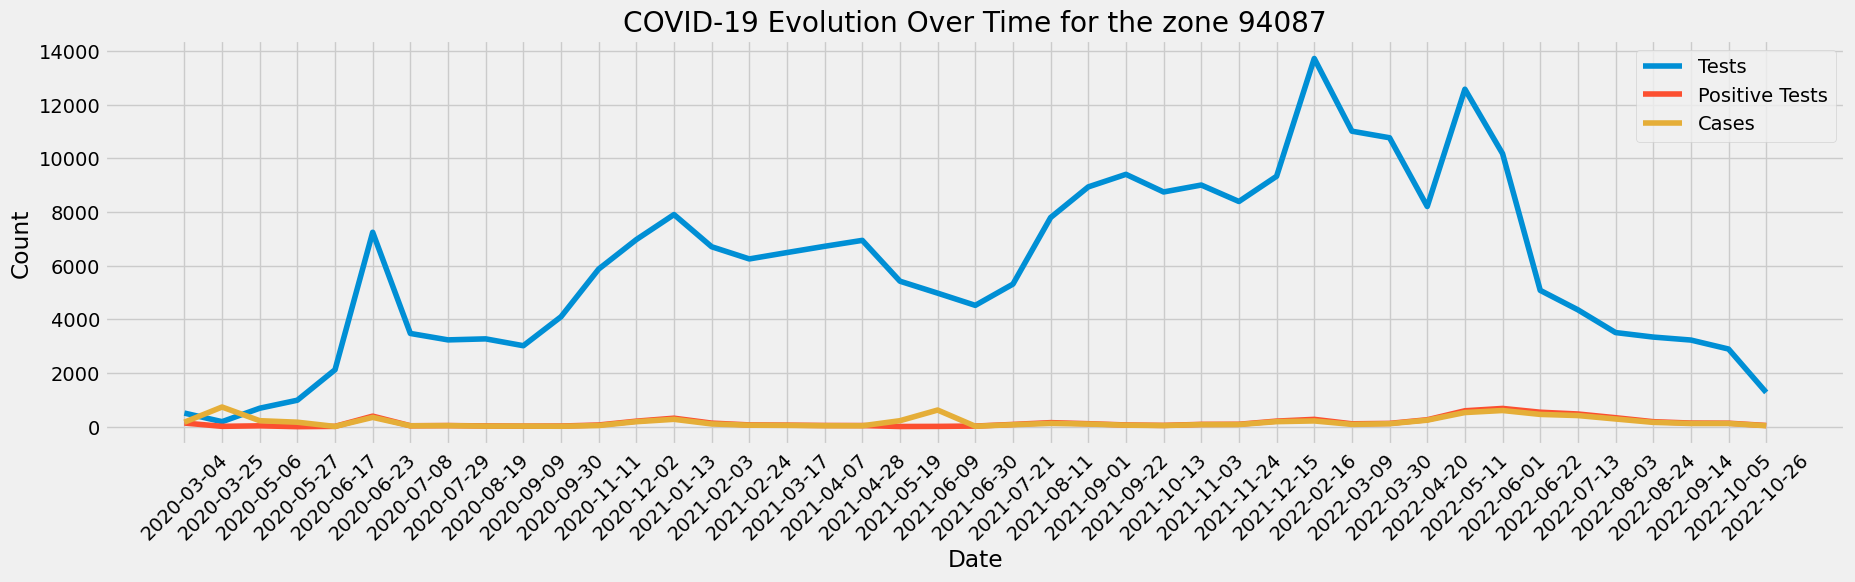

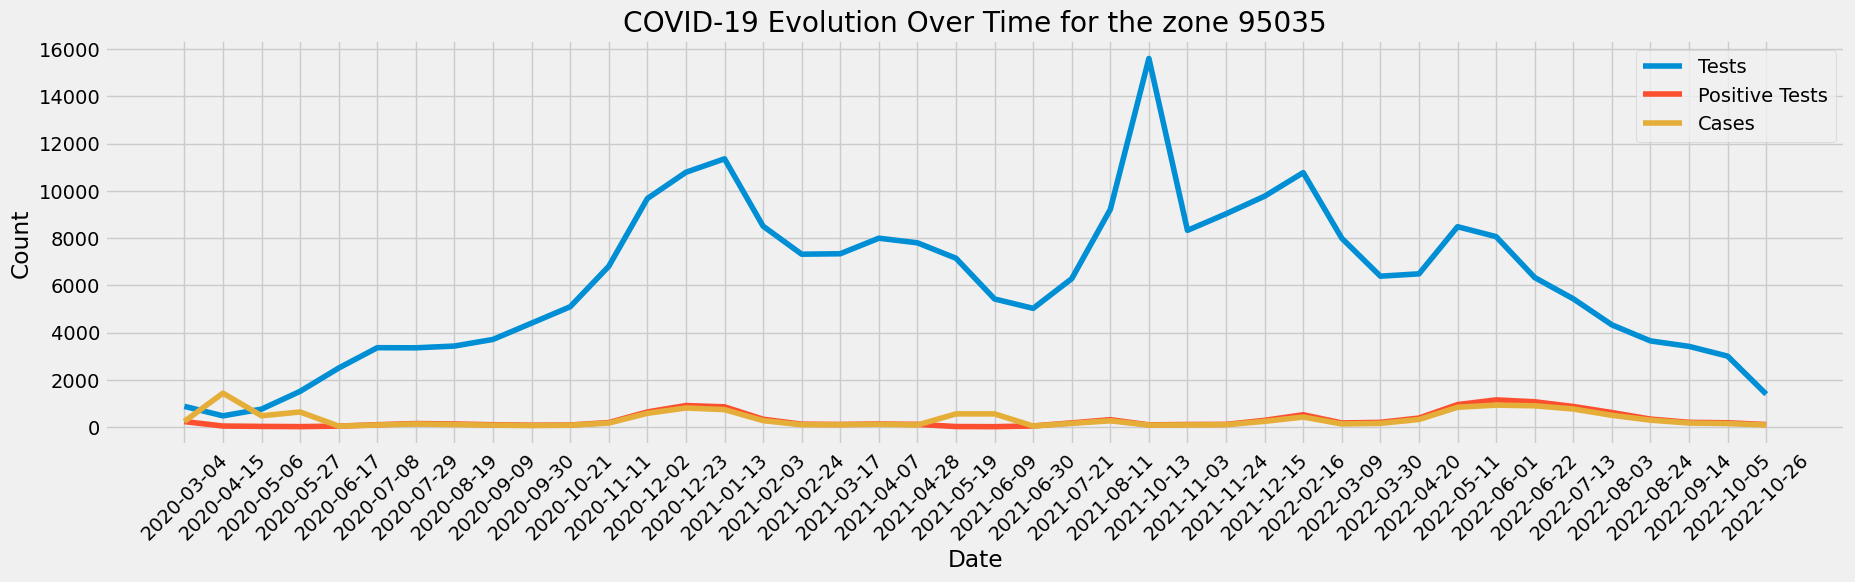

In [63]:
# Get unique zones in the DataFrame
unique_zones = df['zcta'].unique()

# Plotting line charts for all zones

for zone in unique_zones:
    # plt.figure(figsize=(12, 6))
    zone_data = df[df['zcta'] == zone]
    plt.plot(zone_data.index, zone_data['test count'], label=f'Tests')
    plt.plot(zone_data.index,
             zone_data['positive tests'], label=f'Positive Tests')
    plt.plot(zone_data.index, zone_data['case count'], label=f'Cases')
    plt.xlabel('Date', loc='center')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.title(f'COVID-19 Evolution Over Time for the zone {zone}')
    plt.legend()
    plt.grid(True)
    plt.show()

### 3. How are positive COVID cases distributed by zone and by year?

(Guidance: Stacked Bar chart)


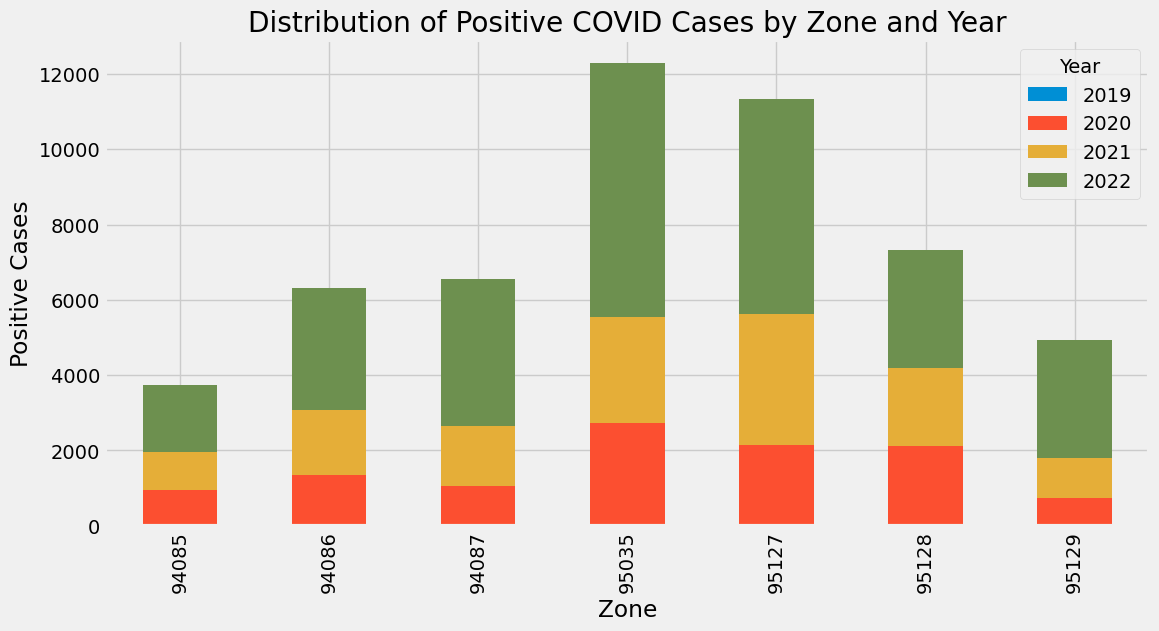

In [95]:
# Extract year from 'Midpoint Date'
df['Year'] = pd.DatetimeIndex(df.index).year
df['Month'] = pd.DatetimeIndex(df.index).month

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
pd.crosstab(df['zcta'], df['Year'], values=df['positive tests'],
            aggfunc='sum').plot(kind='bar', stacked=True, ax=plt.gca())

plt.xlabel('Zone')
plt.ylabel('Positive Cases')
plt.title('Distribution of Positive COVID Cases by Zone and Year')
plt.legend(title='Year', loc='upper right')
plt.show()

### 4. How can we effectively graphically represent the relationship between the population and the number of tests conducted?


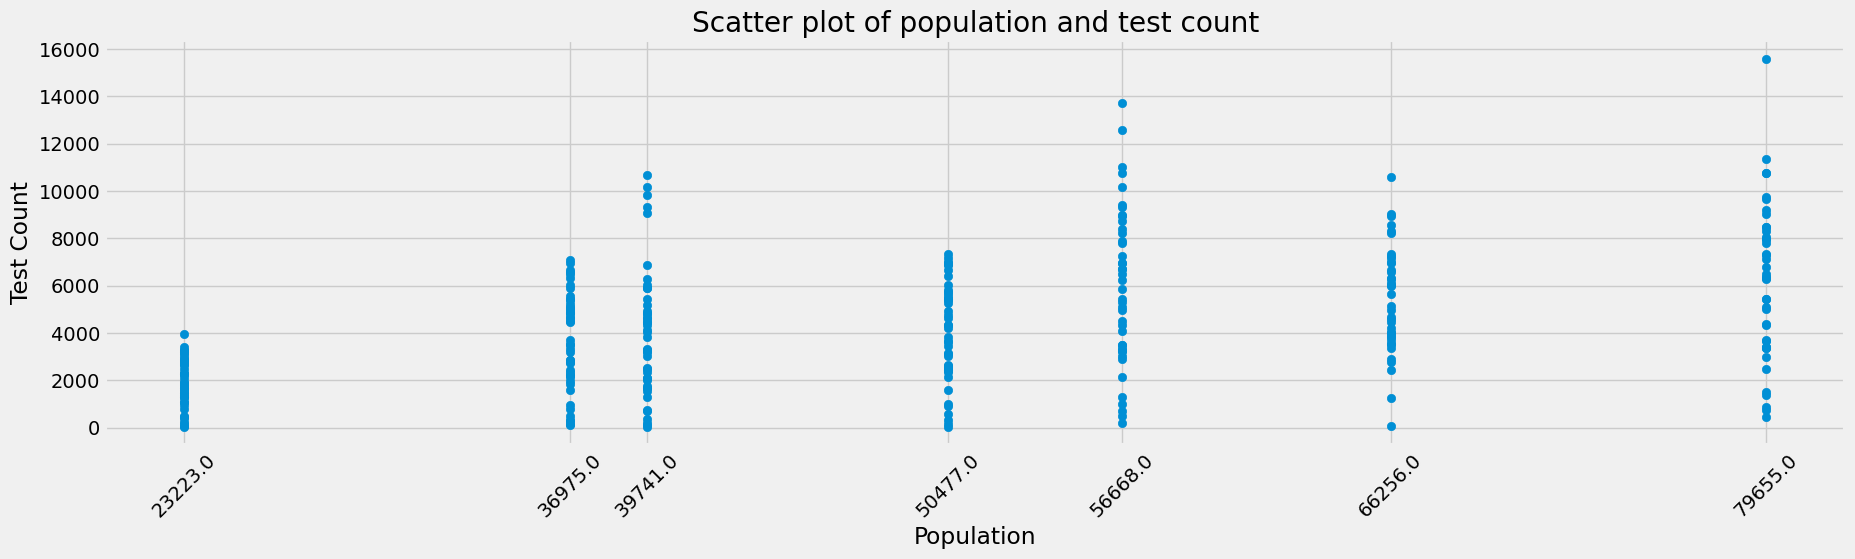

In [65]:
plt.scatter(df['population'], df['test count'])
plt.title('Scatter plot of population and test count')
plt.xlabel('Population')
plt.ylabel('Test Count')
plt.xticks(ticks=df['population'].unique(),
           labels=df['population'].unique(), rotation=45)
plt.show()

### 5. What are the 5 zones most heavily impacted by the coronavirus?


In [66]:
case_count_per_zone = df.groupby('zcta')['case count'].sum()
case_count_per_zone

zcta
94085     5011.0
94086     8690.0
94087     7669.0
95035    14057.0
95127    11609.0
95128     9887.0
95129     5807.0
Name: case count, dtype: float64

Text(0.5, 1.0, 'Proportion of COVID-19 Cases in Different Zones')

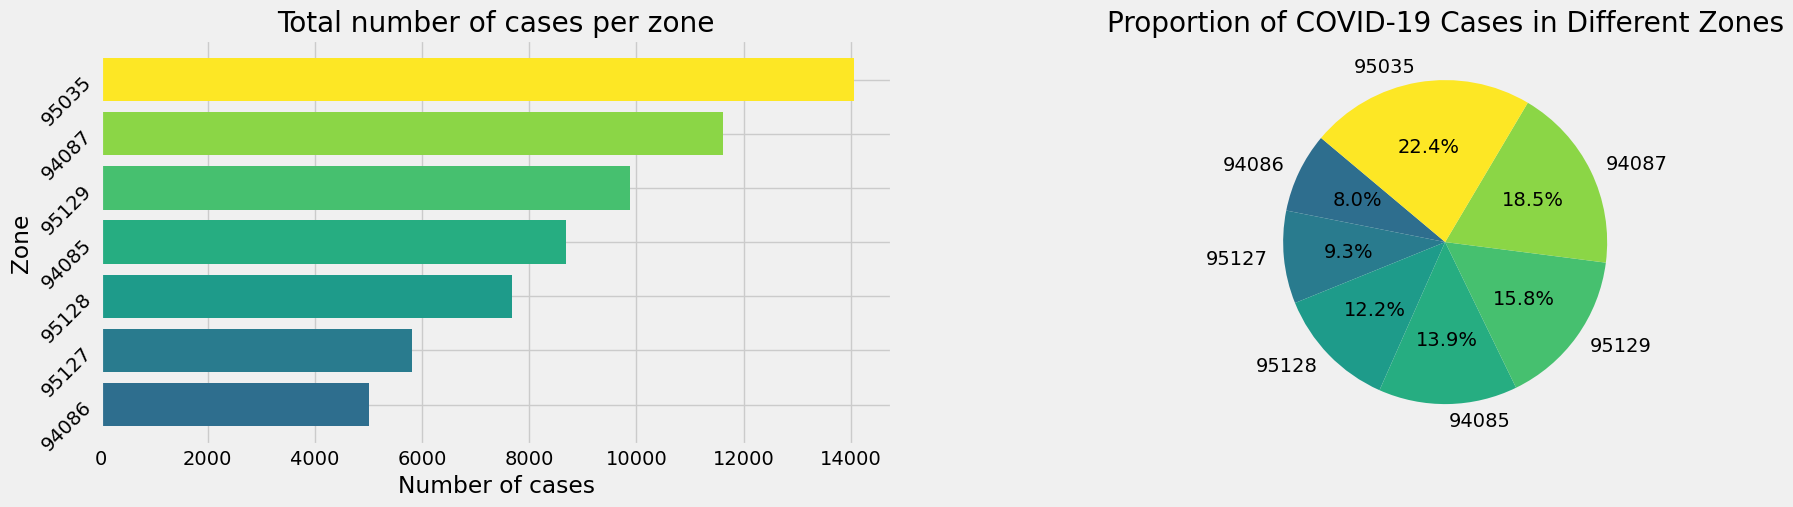

In [77]:
zones = df['zcta'].unique()
case_count_per_zone = df.groupby('zcta')['case count'].sum().sort_values()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].barh(zones, case_count_per_zone, color=plt.cm.viridis(case_count_per_zone / max(case_count_per_zone)))
axs[0].set_title('Total number of cases per zone')
axs[0].set_xlabel('Number of cases')
axs[0].set_yticks(ticks=zones)
axs[0].set_yticklabels(labels=zones, rotation=45)
axs[0].set_ylabel('Zone')

axs[1].pie(case_count_per_zone, labels=zones, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(case_count_per_zone / max(case_count_per_zone)))
axs[1].set_title('Proportion of COVID-19 Cases in Different Zones')

### 6. What is the relationship between confirmed cases, tests conducted, and positive tests over time for each zone?
(The timeframe needs to be selected)


In [89]:
# I will choose the middle month in the df
middle_index = len(df) // 2
middle_date = df.iloc[middle_index]
middle_month = pd.DatetimeIndex(df.index).month[middle_index]
middle_year = pd.DatetimeIndex(df.index).year[middle_index]
middle_month, middle_year

(6, 2021)

In [98]:
# select the data for the middle month of the middle year
df_middle = df[(df['Year'] == middle_year) & (pd.DatetimeIndex(df.index).month == middle_month)]


# Identify the middle 6 months
start_month = middle_month - 2  # Subtract 2 to get 3 months before the middle month
end_month = middle_month + 3    # Add 3 to get 3 months after the middle month

# Select data for the middle 6 months
df_middle_6_months = df[(df['Year'] == middle_year) & (df['Month'].between(start_month, end_month, inclusive='both'))]
df_middle_6_months

,zcta,population,test count,positive tests,case count,test rate,case rate,positivity rate,Year,Month
Midpoint Date,,,,,,,,,,
2021-04-07,94085,23223.0,2817.0,30.0,28.0,577.6,5.7,1.1,2021,4
2021-04-07,94086,50477.0,5655.0,63.0,52.0,533.5,4.9,1.1,2021,4
2021-04-07,94087,56668.0,6726.0,48.0,39.0,565.2,3.3,0.7,2021,4
2021-04-07,95035,79655.0,7992.0,129.0,114.0,477.8,6.8,1.6,2021,4
2021-04-07,95127,66256.0,6125.0,141.0,119.0,440.2,8.6,2.3,2021,4
...,...,...,...,...,...,...,...,...,...,...
2021-09-22,94086,50477.0,7362.0,66.0,48.0,694.5,4.5,0.9,2021,9
2021-09-22,94087,56668.0,9408.0,67.0,60.0,790.6,5.0,0.7,2021,9
2021-09-22,95127,66256.0,9047.0,200.0,154.0,650.2,11.1,2.2,2021,9


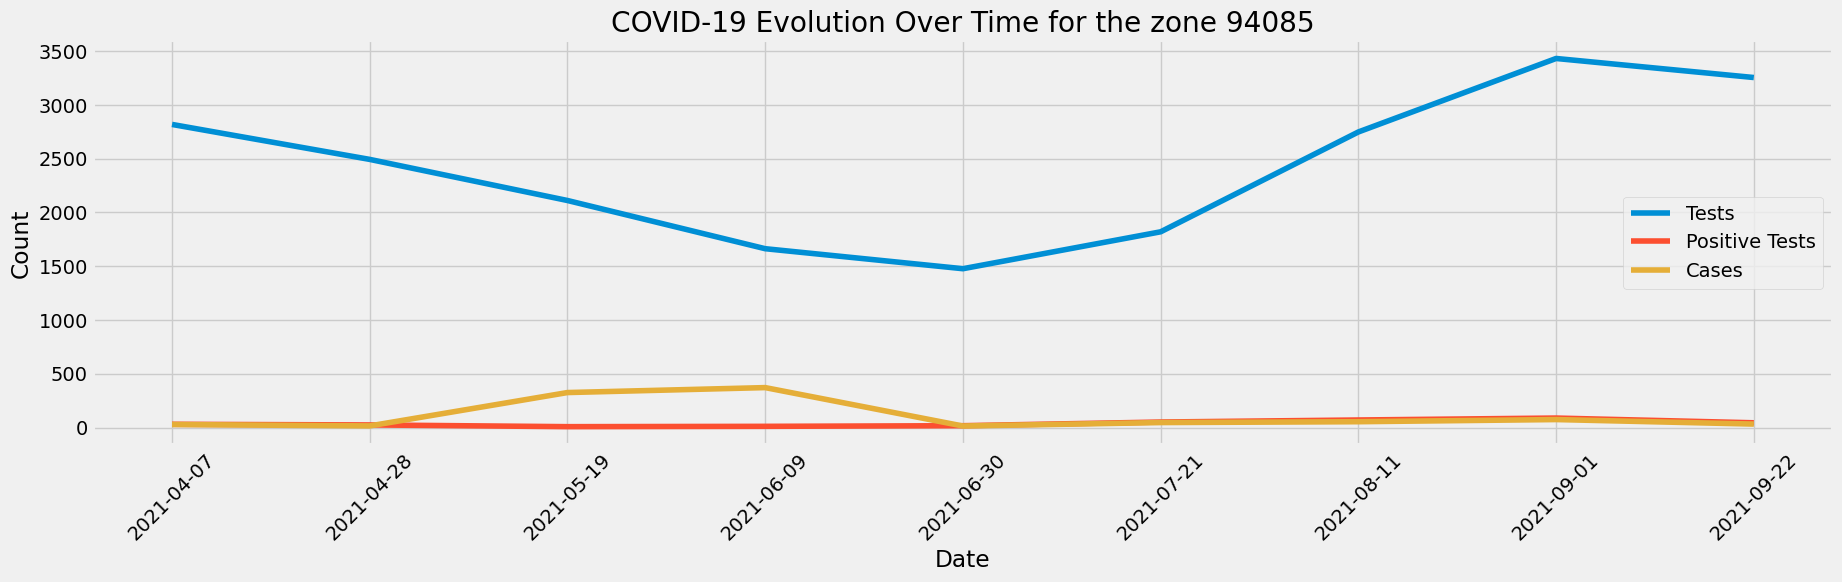

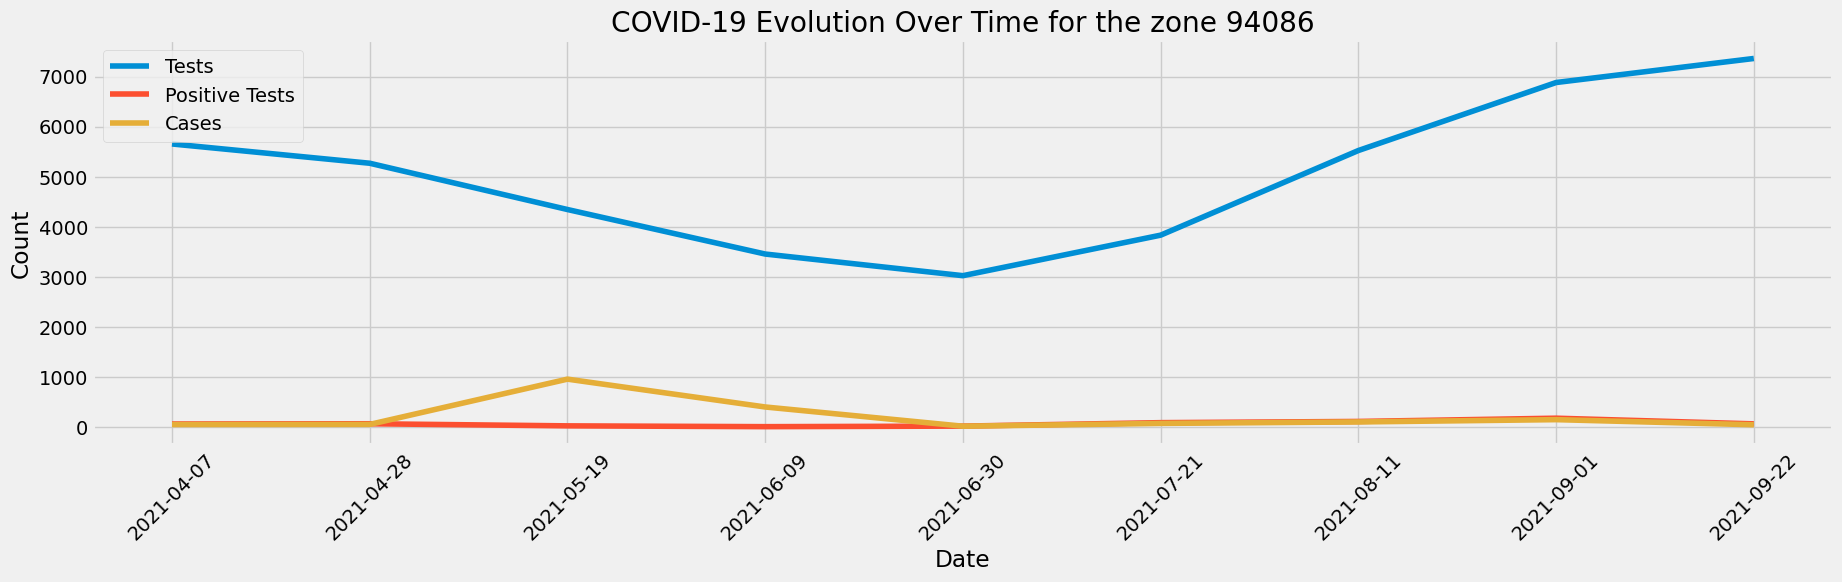

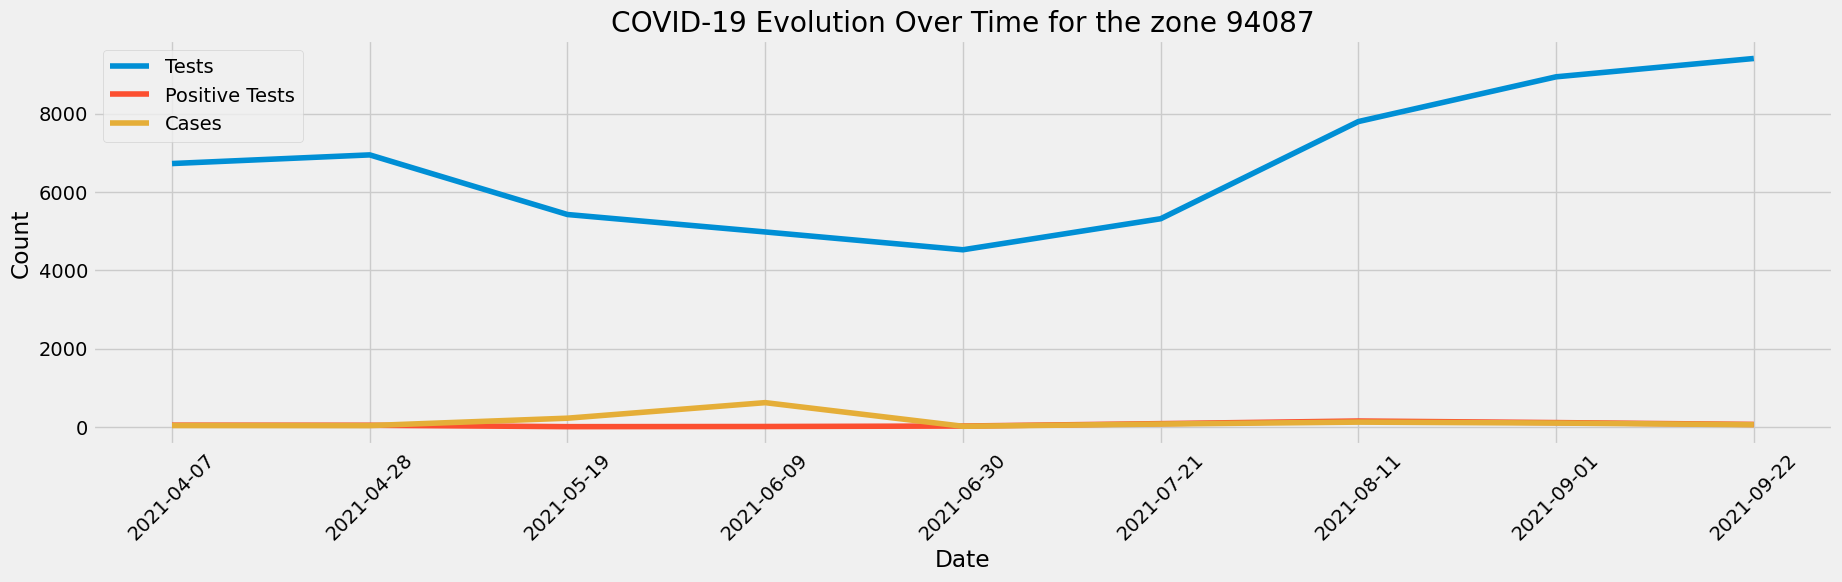

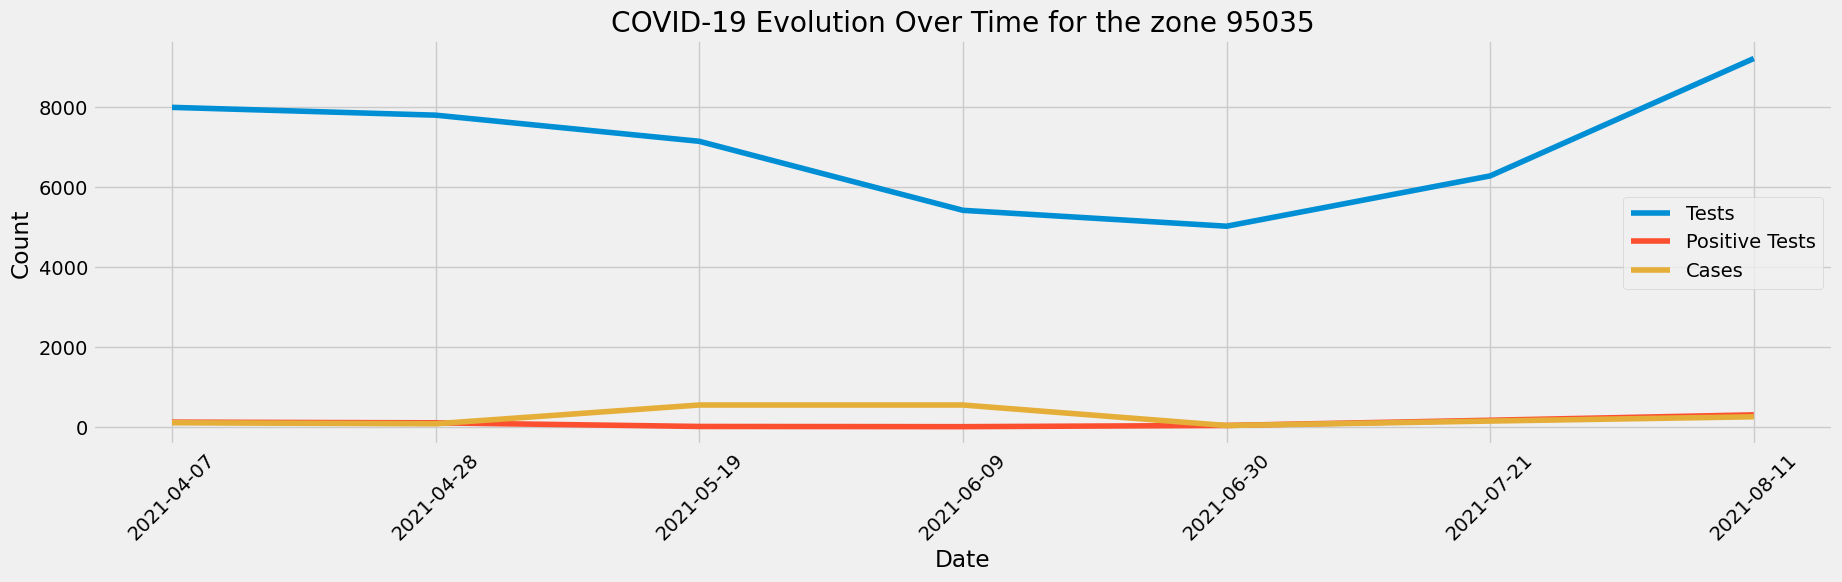

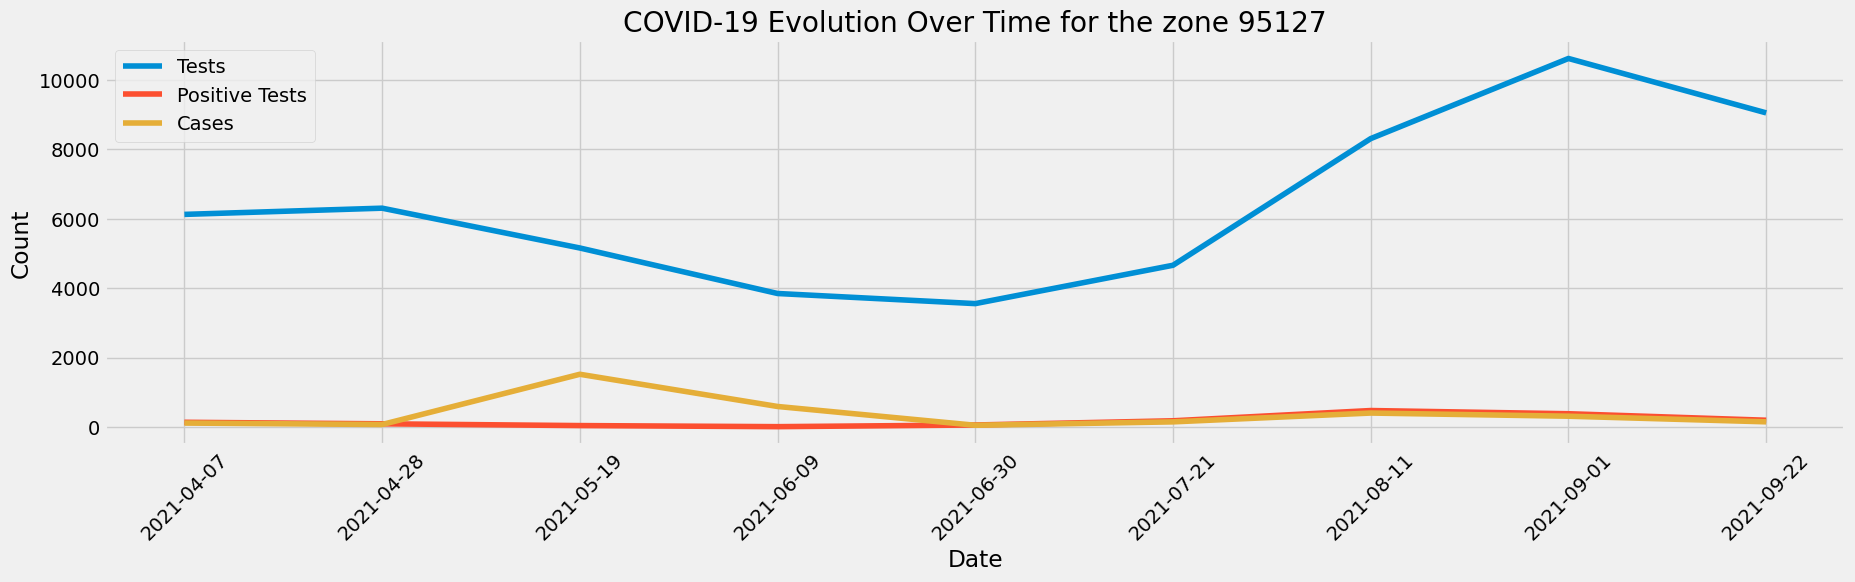

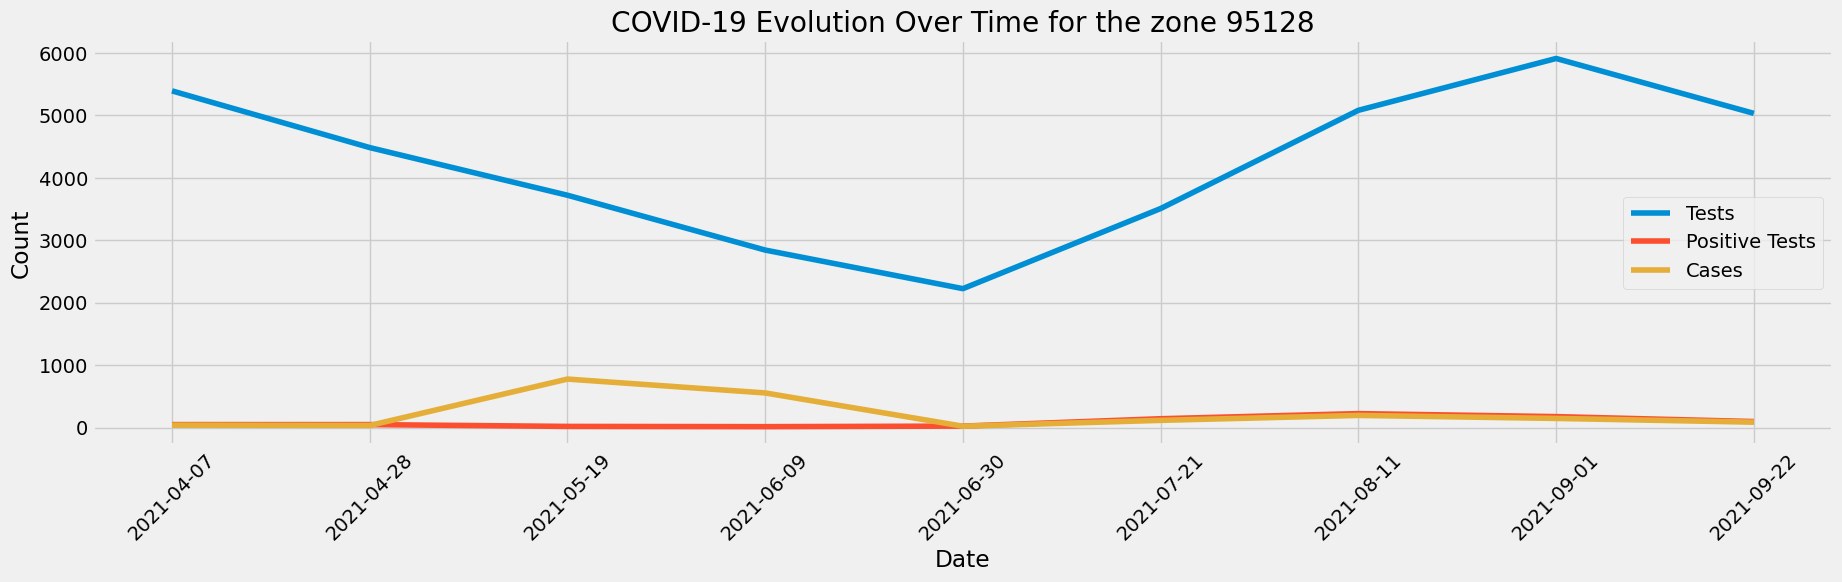

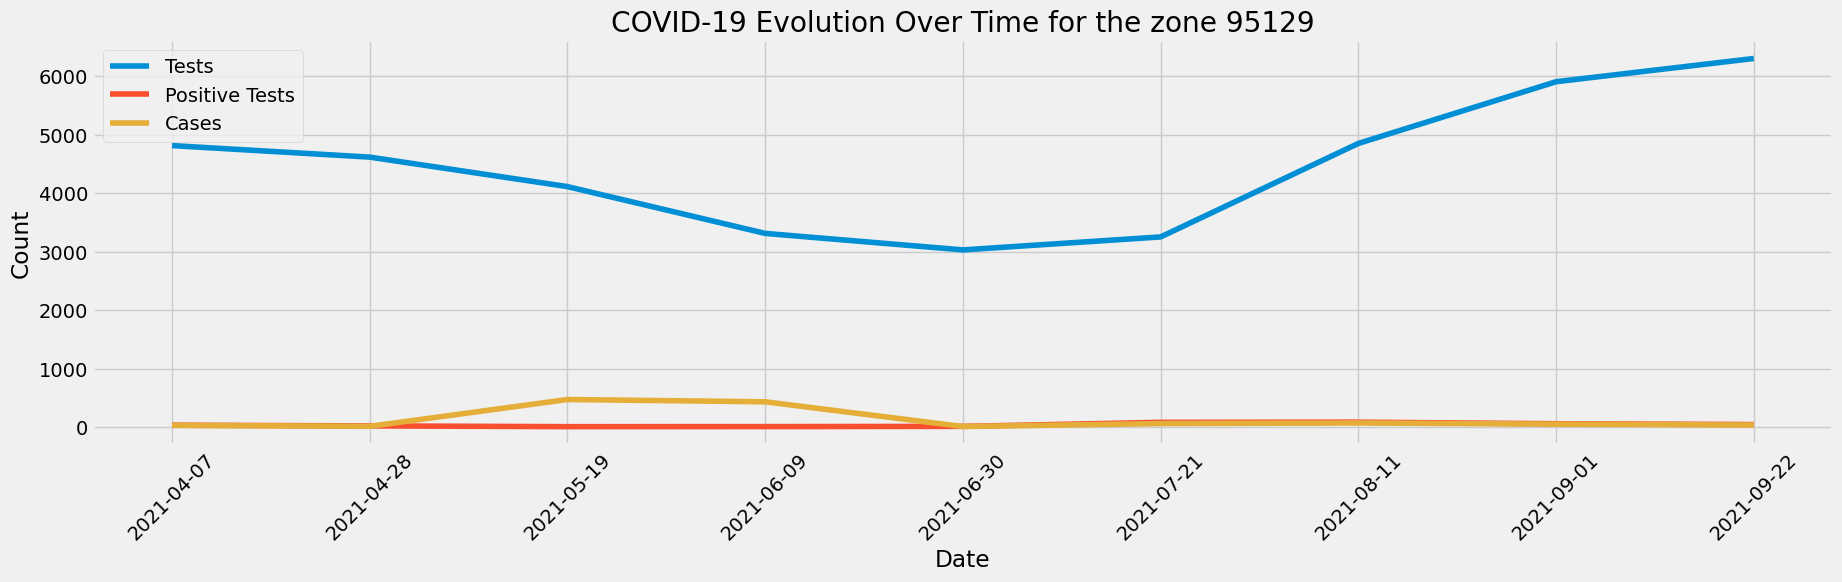

In [99]:
# Get unique zones in the DataFrame
unique_zones = df_middle_6_months['zcta'].unique()

# Plotting line charts for all zones

for zone in unique_zones:
    # plt.figure(figsize=(12, 6))
    zone_data = df_middle_6_months[df_middle_6_months['zcta'] == zone]
    plt.plot(zone_data.index, zone_data['test count'], label=f'Tests')
    plt.plot(zone_data.index,
             zone_data['positive tests'], label=f'Positive Tests')
    plt.plot(zone_data.index, zone_data['case count'], label=f'Cases')
    plt.xlabel('Date', loc='center')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.title(f'COVID-19 Evolution Over Time for the zone {zone}')
    plt.legend()
    plt.grid(True)
    plt.show()